In [1]:
import os 
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

loading up the paths to the images

In [2]:
trainx=[]
trainy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithoutMask", image)
    i=i+1
    trainx.append(image_path)
    trainy.append(0)
    if i==250:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithMask", image)
    i=i+1
    trainx.append(image_path)
    trainy.append(1)
    if i==250:
        break




In [91]:
len(trainy)

500

In [3]:
testx=[]
testy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithoutMask", image)
    i=i+1
    testx.append(image_path)
    testy.append(0)
    if i==50:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithMask", image)
    i=i+1
    testx.append(image_path)
    testy.append(1)
    if i==50:
        break


In [93]:
len(testy)

100

In [4]:
valx=[]
valy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithoutMask", image)
    i=i+1
    valx.append(image_path)
    valy.append(0)
    if i==50:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithMask", image)
    i=i+1
    valx.append(image_path)
    valy.append(1)
    if i==50:
        break

In [95]:
len(valy)

100

storing the images as reshaped arrays

In [5]:
trianimgx=[]
for  i in trainx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    trianimgx.append(normalized_image)

In [6]:
testimgx=[]
for  i in testx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    testimgx.append(normalized_image)

In [7]:
valimgx=[]
for  i in valx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    valimgx.append(normalized_image)

storing the data in a data frame

In [8]:
traindf=pd.DataFrame({"X":trianimgx,"Y":trainy})

In [9]:
testdf=pd.DataFrame({"X":testimgx,"Y":testy})

In [10]:
valdf=pd.DataFrame({"X":valimgx,"Y":valy})

shuffling the data

In [11]:
traindf_final=traindf.sample(frac=1, random_state=42)
testdf_final=testdf.sample(frac=1,random_state=42)
valdf_final=valdf.sample(frac=1,random_state=42)

converting the data to arrays

In [12]:
tax=np.stack(traindf_final['X'].values)
tax = np.expand_dims(tax, axis=-1) 
tay=np.array(traindf_final['Y'].values, dtype=np.int64)

In [104]:
print(tax.shape,tay.shape)

(500, 224, 224, 3, 1) (500,)


In [13]:
vax=np.stack(valdf_final['X'].values)
vax = np.expand_dims(vax, axis=-1) 
vay=np.array(valdf_final['Y'].values, dtype=np.int64)

In [106]:
print(vax.shape,vay.shape)

(100, 224, 224, 3, 1) (100,)


model design

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,098 (42.47 MB)

 Trainable params: 11,132,098 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

training the model

In [27]:
history = model.fit(tax,tay, epochs=6,validation_data=(vax, vay))

Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 766ms/step - accuracy: 0.6180 - loss: 1.2790 - val_accuracy: 0.9100 - val_loss: 0.4017
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 738ms/step - accuracy: 0.8211 - loss: 0.3806 - val_accuracy: 0.8400 - val_loss: 0.2959
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.8516 - loss: 0.3896 - val_accuracy: 0.8600 - val_loss: 0.4536
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step - accuracy: 0.9392 - loss: 0.1742 - val_accuracy: 0.9800 - val_loss: 0.0953
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.9134 - loss: 0.2235 - val_accuracy: 0.9500 - val_loss: 0.2617
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 780ms/step - accuracy: 0.9491 - loss: 0.1447 - val_accuracy: 0.9800 - val_loss: 0.1017


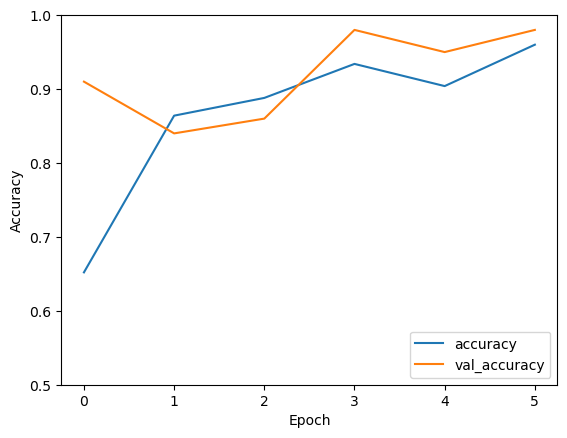

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

testing the model

In [29]:
tsx=np.stack(testdf_final['X'].values)
tsx = np.expand_dims(tsx, axis=-1) 
tsy=np.array(testdf_final['Y'].values, dtype=np.int64)
test_loss, test_acc = model.evaluate(tsx,tsy, verbose=2)

4/4 - 1s - 135ms/step - accuracy: 0.9700 - loss: 0.1023


In [30]:
print(test_acc)

0.9700000286102295


In [31]:
model.save('mask.h5')